In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data.csv')
df.head()

Country or Area  Year                                    Commodity  \
0             USA  2022              Acyclic hydrocarbons; saturated   
1             USA  2022              Acyclic hydrocarbons; saturated   
2             USA  2022              Acyclic hydrocarbons; saturated   
3             USA  2022  Acyclic hydrocarbons; unsaturated, ethylene   
4             USA  2022  Acyclic hydrocarbons; unsaturated, ethylene   

        Flow  Trade (USD)   Weight (kg)        Quantity Name      Quantity  
0     Import    976815342           NaN          No Quantity           NaN  
1  Re-Export      3458447  1.676740e+06  Weight in kilograms  1.676740e+06  
2     Export   4348014280  1.104159e+10  Weight in kilograms  1.104159e+10  
3  Re-Export         6200  6.392000e+03  Weight in kilograms  6.392000e+03  
4     Export   1088578836  1.195359e+09  Weight in kilograms  1.195359e+09

In [3]:
df.tail()

Country or Area  Year                                Commodity  \
29867             USA  1991  Antibiotics; n.e.c. in heading no. 2941   
29868             USA  1991  Antibiotics; n.e.c. in heading no. 2941   
29869             USA  1991  Organic compounds; n.e.c. in chapter 29   
29870             USA  1991  Organic compounds; n.e.c. in chapter 29   
29871             USA  1991  Organic compounds; n.e.c. in chapter 29   

            Flow  Trade (USD)  Weight (kg)        Quantity Name    Quantity  
29867  Re-Export     15113528    8502594.0  Weight in kilograms   8502594.0  
29868     Import    341074765   30264737.0  Weight in kilograms  30264737.0  
29869     Export     61484124   12473080.0  Weight in kilograms  12473080.0  
29870  Re-Export       814111       6678.0  Weight in kilograms      6678.0  
29871     Import     14064661    1847254.0  Weight in kilograms   1847254.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29872 entries, 0 to 29871
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  29872 non-null  object 
 1   Year             29872 non-null  int64  
 2   Commodity        29872 non-null  object 
 3   Flow             29872 non-null  object 
 4   Trade (USD)      29872 non-null  int64  
 5   Weight (kg)      27788 non-null  float64
 6   Quantity Name    29872 non-null  object 
 7   Quantity         27652 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 1.8+ MB


### PRE-CLEANING PHASE 

In [5]:
# Checking for missing data in the dataframe
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': (df.isnull().sum() / len(df)) * 100
})

# Sorting the DataFrame by the percentage of missing values in descending order
missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)

# Displaying the missing data information
missing_data

Column  Missing Count  Missing Percentage
Quantity                Quantity           2220            7.431709
Weight (kg)          Weight (kg)           2084            6.976433
Country or Area  Country or Area              0            0.000000
Year                        Year              0            0.000000
Commodity              Commodity              0            0.000000
Flow                        Flow              0            0.000000
Trade (USD)          Trade (USD)              0            0.000000
Quantity Name      Quantity Name              0            0.000000

In [6]:
df[['Weight (kg)','Quantity']].head()

Weight (kg)      Quantity
0           NaN           NaN
1  1.676740e+06  1.676740e+06
2  1.104159e+10  1.104159e+10
3  6.392000e+03  6.392000e+03
4  1.195359e+09  1.195359e+09

In many cases, if the percentage of missing values is relatively small, it's common to consider dropping those rows. So we will just drop the rows  and remain with the relvant dataset still since commodity and quantity is important for our model

In [7]:
# Drop rows with missing values in 'Weight (kg)' and 'Quantity' columns
df_cleaned = df.dropna(subset=['Weight (kg)', 'Quantity'])

# Verify the changes
print(df_cleaned.isnull().sum())

Country or Area    0
Year               0
Commodity          0
Flow               0
Trade (USD)        0
Weight (kg)        0
Quantity Name      0
Quantity           0
dtype: int64


In [8]:
# Checking  for duplicates in the entire DataFrame
duplicates = df.duplicated()

# Counting the number of duplicates
num_duplicates = duplicates.sum()

# Print the result
print(f"Number of duplicate rows: {num_duplicates}")
duplicate_rows = df[duplicates]
print("Duplicate rows:")
duplicate_rows

Number of duplicate rows: 0
Duplicate rows:


Empty DataFrame
Columns: [Country or Area, Year, Commodity, Flow, Trade (USD), Weight (kg), Quantity Name, Quantity]
Index: []

In [9]:
# Drop 'Quantity Name' and 'Quantity' columns
df_cleaned = df_cleaned.drop(['Quantity Name', 'Quantity'], axis=1)

# Displaying the updated DataFrame
df_cleaned.head()

Country or Area  Year                                          Commodity  \
1             USA  2022                    Acyclic hydrocarbons; saturated   
2             USA  2022                    Acyclic hydrocarbons; saturated   
3             USA  2022        Acyclic hydrocarbons; unsaturated, ethylene   
4             USA  2022        Acyclic hydrocarbons; unsaturated, ethylene   
5             USA  2022  Acyclic hydrocarbons; unsaturated, propene (pr...   

        Flow  Trade (USD)   Weight (kg)  
1  Re-Export      3458447  1.676740e+06  
2     Export   4348014280  1.104159e+10  
3  Re-Export         6200  6.392000e+03  
4     Export   1088578836  1.195359e+09  
5     Import     58702311  6.012495e+07

Reasons for dropping:

Quantity Name: This column is not relevant to the problem statement, and it seems redundant since the type of quantity is not crucial for the analysis of fentanyl precursor flows.

Quantity: As you mentioned, this column essentially contains the same information as the 'Weight (kg)' column, and having both might introduce unnecessary complexity. For the analysis of fentanyl precursor flows, focusing on the weight of the shipments might be more meaningful.

### EXPLORATORY DATA ANALYSIS

UNIVARIATE ANALYSIS

In [10]:
df_cleaned.head()

Country or Area  Year                                          Commodity  \
1             USA  2022                    Acyclic hydrocarbons; saturated   
2             USA  2022                    Acyclic hydrocarbons; saturated   
3             USA  2022        Acyclic hydrocarbons; unsaturated, ethylene   
4             USA  2022        Acyclic hydrocarbons; unsaturated, ethylene   
5             USA  2022  Acyclic hydrocarbons; unsaturated, propene (pr...   

        Flow  Trade (USD)   Weight (kg)  
1  Re-Export      3458447  1.676740e+06  
2     Export   4348014280  1.104159e+10  
3  Re-Export         6200  6.392000e+03  
4     Export   1088578836  1.195359e+09  
5     Import     58702311  6.012495e+07

The Distribution of Trade (USD):

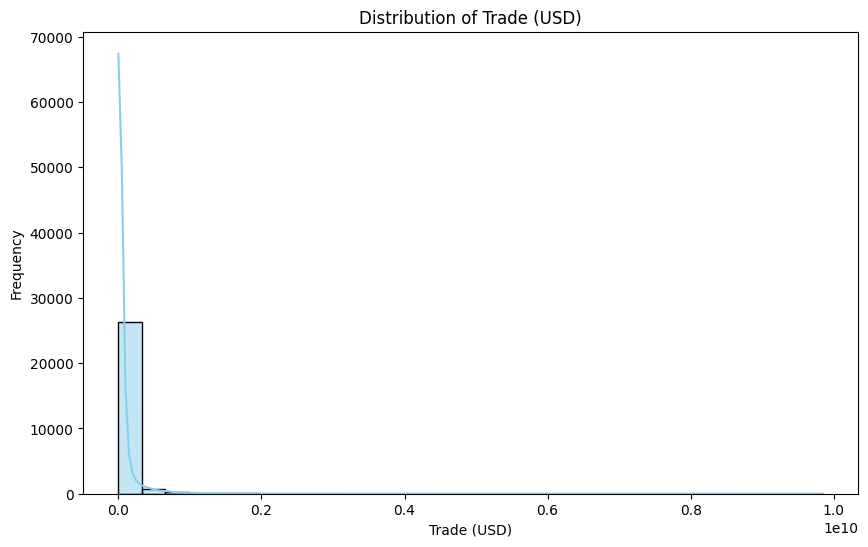

In [11]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Trade (USD)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Trade (USD)')
plt.xlabel('Trade (USD)')
plt.ylabel('Frequency')
plt.show()

The 'Trade (USD)' column represents the monetary value of trade transactions, ranging from a minimum of 1,435 to a maximum of 9,848,174,000, with an average trade value of approximately 72,475,590. The substantial standard deviation of 312,394,400 suggests significant variability in trade amounts, indicating diverse transaction sizes. The majority of trade transactions (75%) fall below 40,045,740, and the median trade value of $6,966,047 provides insight into the central tendency. These statistics highlight the wide-ranging nature of trade activities, emphasizing the need for a comprehensive understanding of the financial aspects involved in tracking the flows of Fentanyl precursor chemicals into the U.S. This information is crucial for identifying patterns, anomalies, and potential indicators in the supply chain related to Fentanyl production.

TOP 10 COMMODITIES BASED ON THEIR FREQUENCY

C:\Users\user\AppData\Local\Temp\ipykernel_10504\3868855060.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_commodities.values, y=top_commodities.index, palette='viridis')


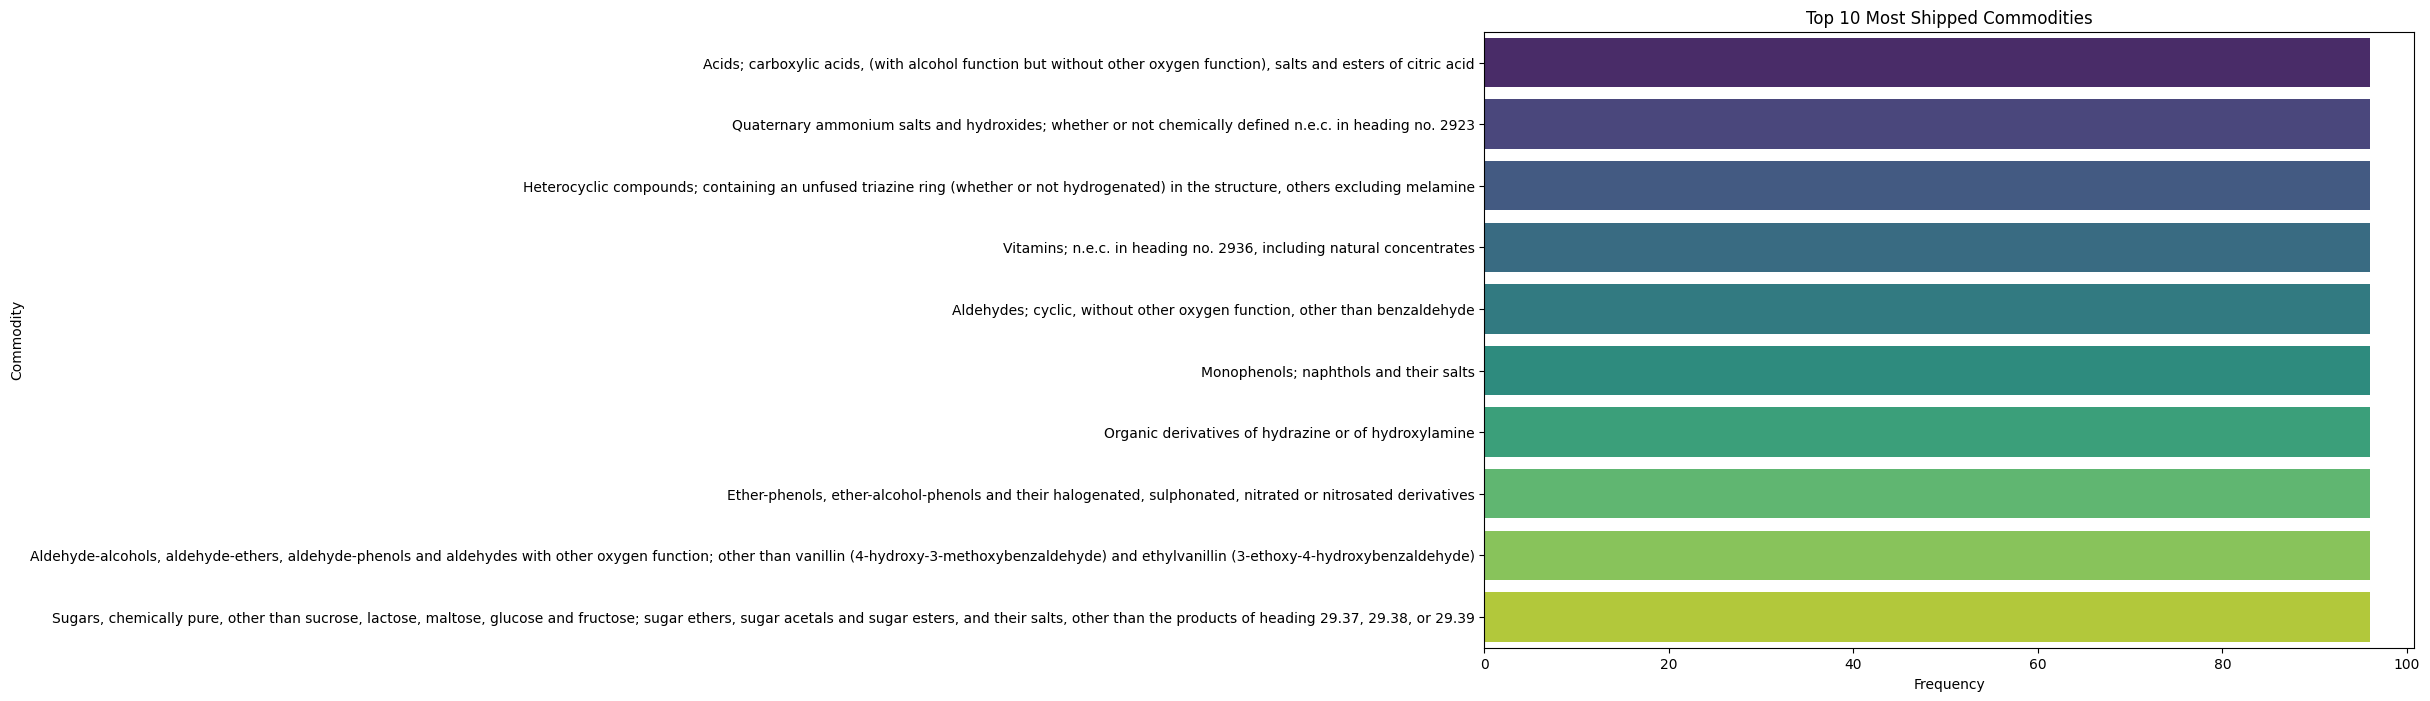

In [12]:
plt.figure(figsize=(12, 8))
top_commodities = df_cleaned['Commodity'].value_counts().nlargest(10)  
sns.barplot(x=top_commodities.values, y=top_commodities.index, palette='viridis')
plt.title('Top 10 Most Shipped Commodities')
plt.xlabel('Frequency')
plt.ylabel('Commodity')
plt.show()

The table shows the count of shipments for the top 10 most shipped commodities in the dataset. These commodities include various chemical compounds and organic derivatives. For instance, the top commodity is "Acids; carboxylic acids, salts and esters of citric acid," which has a count of 96 shipments. Similarly, other commodities such as "Quaternary ammonium salts and hydroxides," "Heterocyclic compounds containing an unfused triazine ring," and "Vitamins" also have counts of 96 each. This information provides insight into the distribution of shipments across different chemical and organic products. It is valuable for understanding the prevalence of specific commodities in the trade data and can assist in identifying patterns or trends related to the business problem of tracking Fentanyl precursor chemicals.

#### BIVARIATE DISTRIBUTION

Trade vs. Weight:

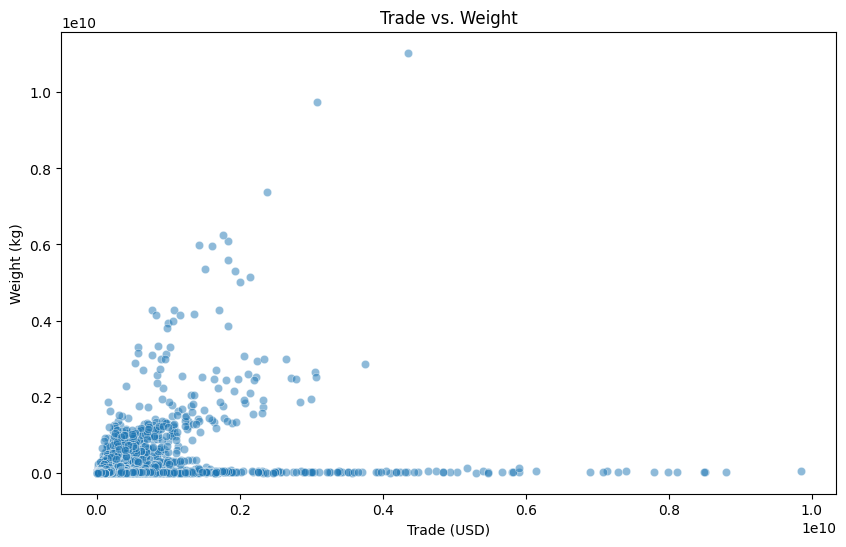

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Trade (USD)', y='Weight (kg)', data=df_cleaned, alpha=0.5)
plt.title('Trade vs. Weight')
plt.xlabel('Trade (USD)')
plt.ylabel('Weight (kg)')
plt.show()

In [14]:
# Descriptive statistics for 'Trade (USD)' and 'Weight (kg)'
trade_weight_stats = df_cleaned[['Trade (USD)', 'Weight (kg)']].describe()

# Correlation between 'Trade (USD)' and 'Weight (kg)'
correlation = df_cleaned['Trade (USD)'].corr(df_cleaned['Weight (kg)'])

print("Descriptive Statistics:")
print(trade_weight_stats)

print("\nCorrelation between Trade and Weight:")
print(f"Correlation coefficient: {correlation}")


Descriptive Statistics:
        Trade (USD)   Weight (kg)
count  2.751000e+04  2.751000e+04
mean   7.247559e+07  3.471751e+07
std    3.123944e+08  2.207679e+08
min    1.435000e+03  1.000000e+00
25%    6.191745e+05  6.575150e+04
50%    6.966047e+06  1.084249e+06
75%    4.004574e+07  1.072986e+07
max    9.848174e+09  1.104159e+10

Correlation between Trade and Weight:
Correlation coefficient: 0.34655799845400065


The descriptive statistics provide a comprehensive view of the trade values and shipment weights in the dataset. On average, the trade value per entry is approximately 72.48 million, with a wide range from 1,435 to $9.85 billion. The shipment weights exhibit similar variability, with an average of around 34.72 million kilograms and a range from 1 kilogram to a substantial 11.04 billion kilograms.

The correlation coefficient between trade values and shipment weights is 0.35, suggesting a moderate positive correlation. This implies that, on average, as the trade value increases, so does the shipment weight, and vice versa. However, it's crucial to note that correlation does not imply causation. This insight could be valuable in understanding potential patterns or trends in the shipping of goods and their associated weights, contributing to the broader goal of tracking fentanyl precursor chemicals in international trade. Further exploration of this relationship could unveil nuanced insights for regulatory and monitoring efforts.

Trade (USD) vs. Year

C:\Users\user\AppData\Local\Temp\ipykernel_3252\391776490.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Trade (USD)', data=df_cleaned, ci=None)


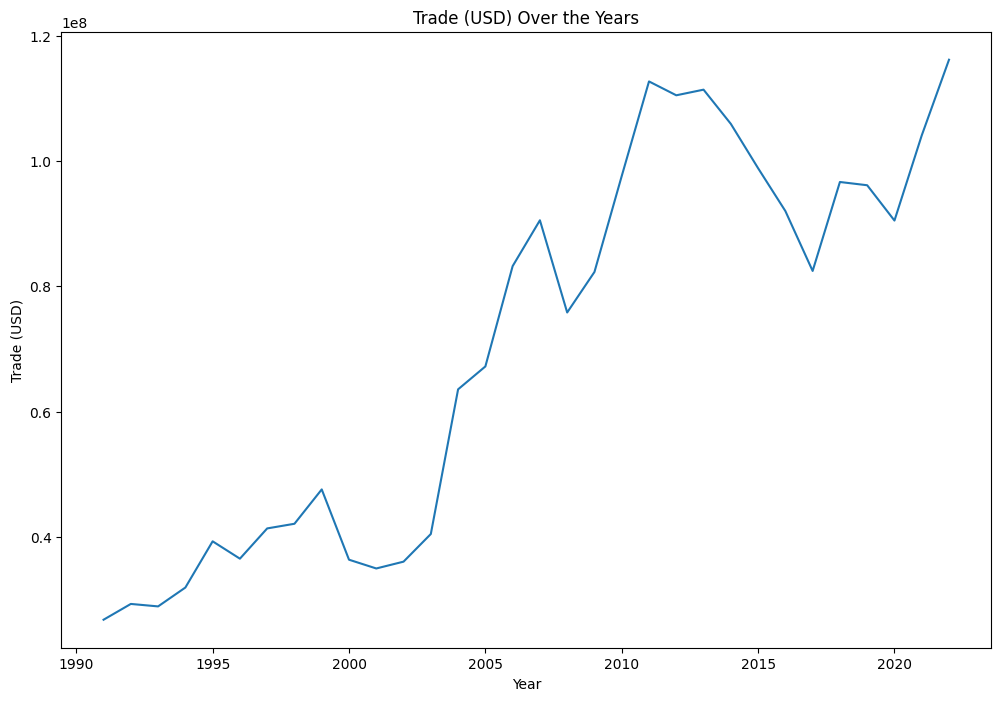

In [15]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Trade (USD)', data=df_cleaned, ci=None)
plt.title('Trade (USD) Over the Years')
plt.xlabel('Year')
plt.ylabel('Trade (USD)')
plt.show()


The graph is portraying a rising demand for fentanyl has risen over the years.A rising trend in 'Trade (USD)' over the years in the context of fentanyl precursor flows suggests an increasing economic activity related to these substances. This could be indicative of several scenarios:

Increased Demand: The rising trend may imply a growing demand for fentanyl precursors, either domestically or internationally. This could be influenced by various factors such as changes in regulations, market conditions, or the pharmaceutical industry.

Supply Chain Dynamics: It could also indicate changes in the supply chain dynamics of fentanyl precursors. This might be due to alterations in production locations, distribution networks, or sourcing strategies.

Market Dynamics: Economic factors, geopolitical events, or shifts in law enforcement strategies can also influence the market for fentanyl precursors. The rising trend may reflect changes in these external factors.

Potential Risk: From a regulatory and law enforcement perspective, a rising trend might raise concerns about the potential misuse or diversion of these precursor chemicals for illegal purposes.

#### Temporal Analysis by Flow Type:

we need to examine how the trade values differ over the years based on the 'Flow' (import or export). This can help identify any patterns or trends specific to the direction of trade.

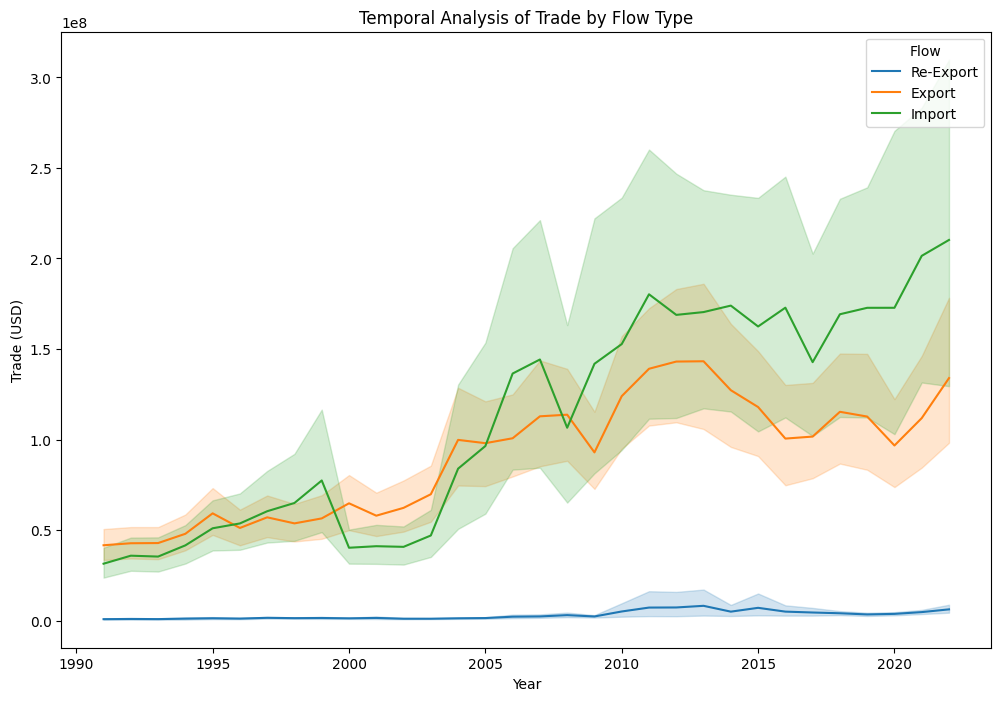

In [16]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Trade (USD)', hue='Flow', data=df_cleaned)
plt.title('Temporal Analysis of Trade by Flow Type')
plt.show()

Export Trend (1991-2022):

The mean trade value for exports has shown a steady increase over the years, reaching approximately $133.92 million in 2022.
The export trade has substantial variability, as indicated by the standard deviation.
Import Trend (1991-2022):

The mean trade value for imports has also exhibited an upward trend, peaking at around $210.25 million in 2022.
Similar to exports, imports display considerable variability, as shown by the standard deviation.
Re-Export Trend (1991-2022):

Re-exports have a much lower mean compared to direct imports and exports, with an average of approximately $6.16 million in 2022.
The standard deviation suggests relatively less variability compared to exports and imports.
Overall Observations:

Both export and import activities have grown over the years, reflecting an expansion in international trade.
The substantial standard deviations in export and import figures indicate a diverse range of traded commodities and the influence of external factors on trade values.
Re-exports, while showing a rising trend, remain comparatively lower, indicating a different nature of trade activity.

#### Which year had the most shipments for each commodity

In [17]:
# Group by 'Year' and 'Commodity', then sum the 'Quantity' for each group
commodity_year_totals = df_cleaned.groupby(['Year', 'Commodity'])['Weight (kg)'].sum().reset_index()

# Find the year with the maximum quantity for each commodity
max_shipment_years = commodity_year_totals.loc[commodity_year_totals.groupby('Commodity')['Weight (kg)'].idxmax()]

# Display the result
print(max_shipment_years)

      Year                                          Commodity  Weight (kg)
1787  1997            1,2-dichloropropane and dichlorobutanes   20559664.0
2406  1999                            2-Acetomidobenzoic acid      60625.0
885   1994                              2-Ethoxyethyl acetate   43945650.0
2     1991  4-hydroxy-4-methylpentan-2-one(diacetone alcohol)    1673394.0
3257  2002  Acetals and hemiacetals; whether or not with o...    8767477.0
...    ...                                                ...          ...
9471  2020  Vitamins; vitamin B6 and its derivatives, unmixed    2050627.0
9472  2020   Vitamins; vitamin C and its derivatives, unmixed   71486160.0
9841  2021   Vitamins; vitamin E and its derivatives, unmixed   45261380.0
5346  2008  Vitamins; vitamins A and their derivatives, un...   10727055.0
1180  1994                             Xylenols & their salts   52149671.0

[484 rows x 3 columns]


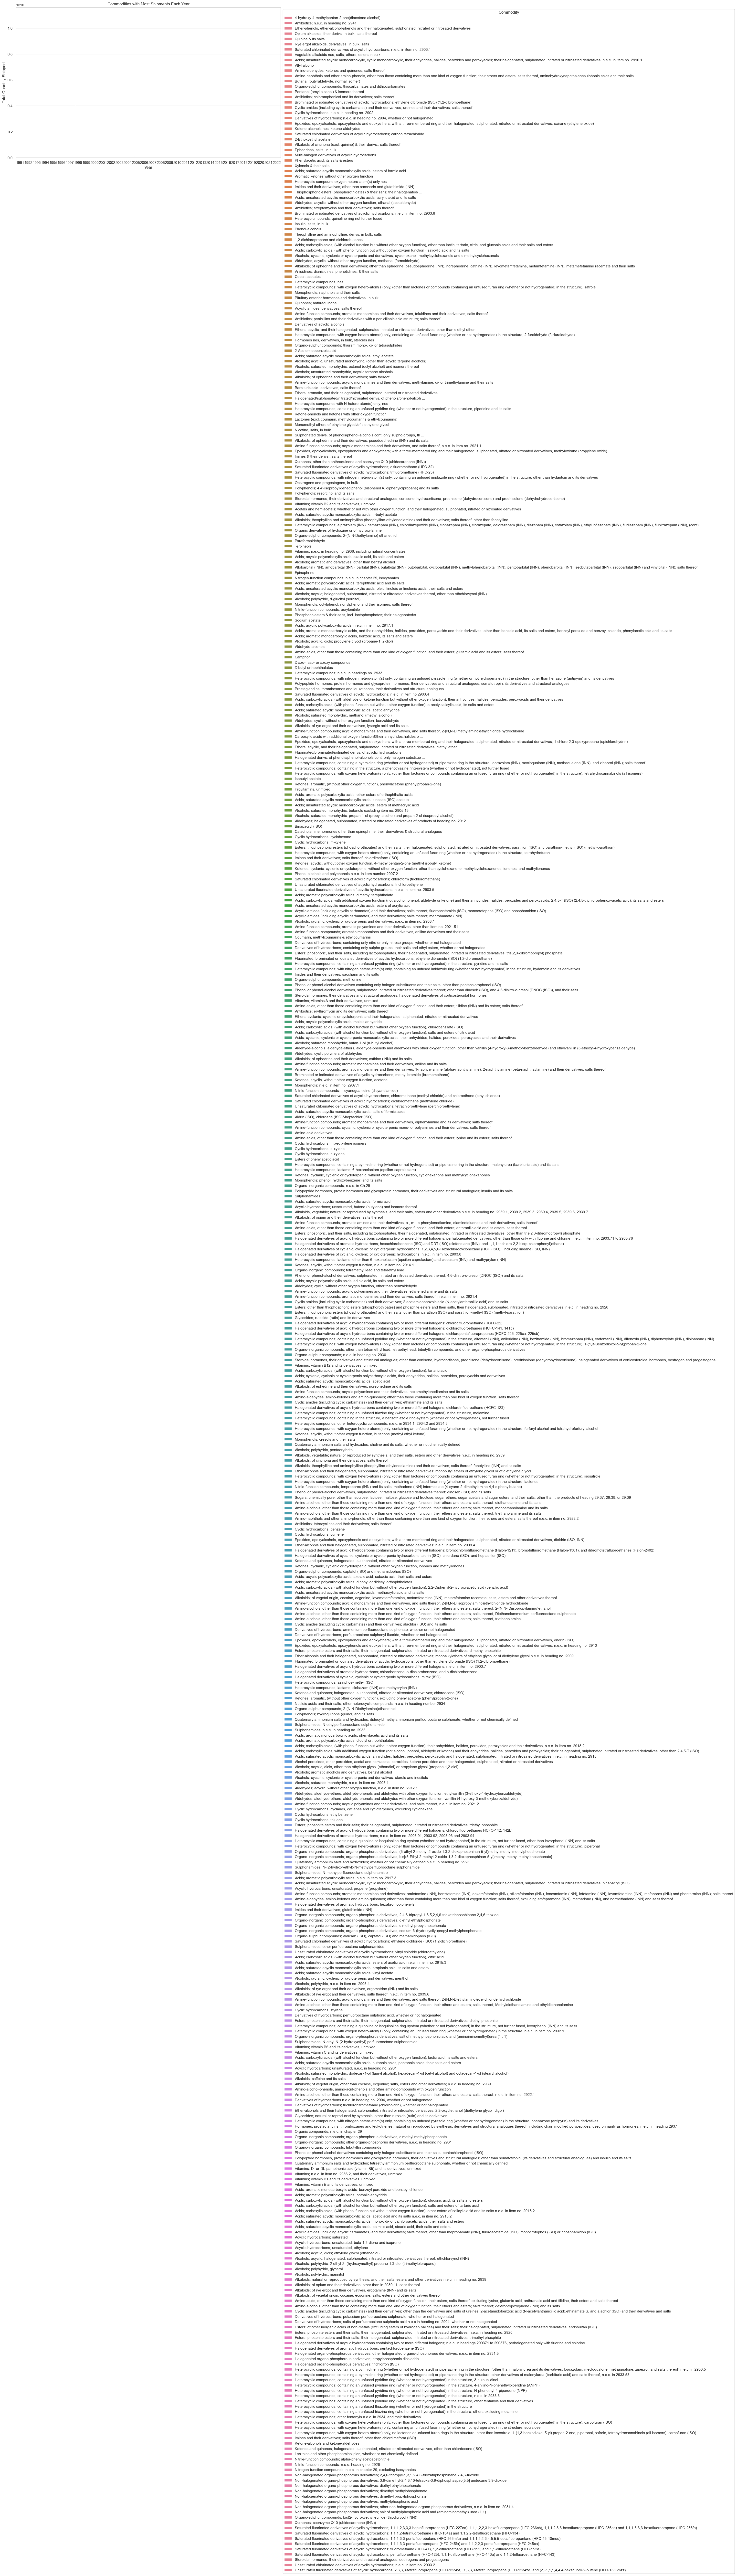

In [18]:
# Set the plot style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Year', y='Weight (kg)', hue='Commodity', data=max_shipment_years, dodge=True)

# Set plot labels and title
plt.title('Commodities with Most Shipments Each Year')
plt.xlabel('Year')
plt.ylabel('Total Quantity Shipped')

# Display the legend
plt.legend(title='Commodity', bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot
plt.show()

1997 - 1,2-dichloropropane and dichlorobutanes: In 1997, a significant amount (20,559,664 kg) of 1,2-dichloropropane and dichlorobutanes was shipped. This may be indicative of a specific demand or production trend for these chemicals in that year.

1999 - 2-Acetomidobenzoic acid: The year 1999 saw a shipment of 2-Acetomidobenzoic acid with a weight of 60,625 kg. Understanding the reasons behind such shipments can provide insights into the factors driving the demand for this specific chemical.

1994 - 2-Ethoxyethyl acetate: With a substantial weight of 43,945,650 kg, the shipping of 2-Ethoxyethyl acetate in 1994 suggests a notable demand or supply chain activity for this chemical during that period.

2002 - Acetals and hemiacetals: In 2002, Acetals and hemiacetals were shipped with a total weight of 8,767,477 kg. Investigating the context of this shipment can reveal patterns or events influencing the trade of these compounds.

2020 - Vitamins (B6, C, and E): The year 2020 saw shipments of various vitamins, including vitamin B6, vitamin C, and vitamin E, with respective weights of 2,050,627 kg, 71,486,160 kg, and 45,261,380 kg. This may be associated with health and wellness trends or specific global events impacting vitamin trade.

2008 - Vitamins (A and derivatives): In 2008, there were shipments of vitamins A and their derivatives totaling 10,727,055 kg. The quantity shipped might be influenced by factors such as dietary trends or changes in nutritional preferences.

1994 - Xylenols & their salts: Xylenols and their salts were shipped in 1994, with a substantial weight of 52,149,671 kg. Understanding the applications and industries associated with these chemicals in that year can provide context for this significant shipment.

 Total trade (in USD) for the commodity

You can observe the trend in trade for "Acyclic hydrocarbons; saturated" over the years. For instance, you can identify periods of growth or decline in trade value. This information is valuable for understanding the commodity's market dynamics and may influence business strategies related to the production, distribution, or trading of this specific chemical compound. Additionally, comparing this trend with broader economic indicators or industry-specific events may provide further insights into the factors affecting the trade of this particular commodity.

## MODELLING

PRE-PROCESSING PHASE 

In [13]:
# Check class distribution of Commodity since its our target variable 
class_distribution = df_cleaned['Commodity'].value_counts()
print(class_distribution)

Commodity
Acids; carboxylic acids, (with alcohol function but without other oxygen function), salts and esters of citric acid                      96
Quaternary ammonium salts and hydroxides; whether or not chemically defined n.e.c. in heading no. 2923                                   96
Heterocyclic compounds; containing an unfused triazine ring (whether or not hydrogenated) in the structure, others excluding melamine    96
Vitamins; n.e.c. in heading no. 2936, including natural concentrates                                                                     96
Aldehydes; cyclic, without other oxygen function, other than benzaldehyde                                                                96
                                                                                                                                         ..
Binapacryl (ISO)                                                                                                                          2
Non-haloge

In [14]:
df_cleaned.head()

Country or Area  Year                                          Commodity  \
1             USA  2022                    Acyclic hydrocarbons; saturated   
2             USA  2022                    Acyclic hydrocarbons; saturated   
3             USA  2022        Acyclic hydrocarbons; unsaturated, ethylene   
4             USA  2022        Acyclic hydrocarbons; unsaturated, ethylene   
5             USA  2022  Acyclic hydrocarbons; unsaturated, propene (pr...   

        Flow  Trade (USD)   Weight (kg)  
1  Re-Export      3458447  1.676740e+06  
2     Export   4348014280  1.104159e+10  
3  Re-Export         6200  6.392000e+03  
4     Export   1088578836  1.195359e+09  
5     Import     58702311  6.012495e+07

In [15]:
#Performing label encoding to transform the categorical variable to numeric in preparation  for machine learning
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_cleaned['Flow'] = label_encoder.fit_transform(df_cleaned['Flow'])

In [16]:
df_cleaned.head()

Country or Area  Year                                          Commodity  \
1             USA  2022                    Acyclic hydrocarbons; saturated   
2             USA  2022                    Acyclic hydrocarbons; saturated   
3             USA  2022        Acyclic hydrocarbons; unsaturated, ethylene   
4             USA  2022        Acyclic hydrocarbons; unsaturated, ethylene   
5             USA  2022  Acyclic hydrocarbons; unsaturated, propene (pr...   

   Flow  Trade (USD)   Weight (kg)  
1     2      3458447  1.676740e+06  
2     0   4348014280  1.104159e+10  
3     2         6200  6.392000e+03  
4     0   1088578836  1.195359e+09  
5     1     58702311  6.012495e+07

In [17]:
#Performing label encoding to transform the categorical variable to numeric in preparation  for machine learning
df_cleaned['Commodity'] = label_encoder.fit_transform(df_cleaned['Commodity'])

The 'Commodity' column contains multiple categories, each appearing 96 times. In this case, it appears more like label encoding, where each category is assigned a unique label or code. This is because all instances of a specific commodity share the same label (e.g., 'Acids; carboxylic acids' has label 0, 'Quaternary ammonium salts and hydroxides' has label 1, and so on).

If these labels have been assigned based on some inherent order or ranking, it's label encoding. 

In [18]:
#Processed dataset
df_cleaned.head(20)

Country or Area  Year  Commodity  Flow  Trade (USD)   Weight (kg)
1              USA  2022         66     2      3458447  1.676740e+06
2              USA  2022         66     0   4348014280  1.104159e+10
3              USA  2022         69     2         6200  6.392000e+03
4              USA  2022         69     0   1088578836  1.195359e+09
5              USA  2022         71     1     58702311  6.012495e+07
6              USA  2022         71     2       389614  3.250500e+04
7              USA  2022         71     0    592225153  5.537992e+08
8              USA  2022         68     1        79638  4.306000e+04
9              USA  2022         68     0    216159293  1.499727e+08
10             USA  2022         68     2         2963  1.949000e+03
11             USA  2022         67     1    585035452  3.437920e+08
12             USA  2022         67     0     81010992  5.621658e+07
13             USA  2022         67     2      3046352  3.119396e+06
15             USA  2022         70     2    103311596  6.506086e+07
16             USA  2022         70     0   1136880465  7.024783e+08
17             USA  2022        201     1       289075  6.195400e+04
18             USA  2022        201     0    130630332  1.119437e+08
19             USA  2022        201     2       521632  1.050140e+05
21             USA  2022        200     2      3174419  1.770599e+06
22             USA  2022        200     0    176214857  4.236726e+07

Given our problem statement, we are interested in identifying and tracking the flows of Fentanyl precursor chemicals into the United States over time. To achieve this we are going to use the trade volume feature to model this behaviour.

In [20]:
df_cleaned.head()

Country or Area  Year  Commodity  Flow  Trade (USD)   Weight (kg)
1             USA  2022         66     2      3458447  1.676740e+06
2             USA  2022         66     0   4348014280  1.104159e+10
3             USA  2022         69     2         6200  6.392000e+03
4             USA  2022         69     0   1088578836  1.195359e+09
5             USA  2022         71     1     58702311  6.012495e+07

## LINEAR REGRESSION

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Identifying  the outliers

In [46]:
# Define the features (independent variables) and target variable (dependent variable)
X = df_cleaned[['Commodity', 'Weight (kg)']]
y = df_cleaned['Trade (USD)']

# Calculate the interquartile range (IQR) for each column
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)
outliers

1        False
2         True
3        False
4         True
5         True
         ...  
29867    False
29868     True
29869    False
29870    False
29871    False
Length: 27510, dtype: bool

In [47]:
# Remove outliers from the dataset
X_no_outliers = X[~outliers]
y_no_outliers = y[~outliers]

In [48]:
# Print the number of outliers removed
num_outliers_removed = outliers.sum()
print("Number of outliers removed:", num_outliers_removed)

Number of outliers removed: 4116


### Testing for multicollinearity

In [50]:
from sklearn.preprocessing import StandardScaler

# Calculate the correlation matrix
correlation_matrix = df_cleaned[['Commodity','Weight (kg)']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)
# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features:", np.mean(X_scaled, axis=0))


Correlation Matrix:
             Commodity  Weight (kg)
Commodity      1.00000     -0.04003
Weight (kg)   -0.04003      1.00000
Mean of Scaled Features: [ 5.52730445e-17 -2.06628204e-18]
Standard Deviation of Scaled Features: [1. 1.]


In [51]:
from sklearn.preprocessing import StandardScaler

# Select the features 'Commodity' and 'Weight (kg)'
X = df_cleaned[['Commodity', 'Weight (kg)']]

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features:", np.mean(X_scaled, axis=0))
print("Standard Deviation of Scaled Features:", np.std(X_scaled, axis=0))


Mean of Scaled Features: [ 5.52730445e-17 -2.06628204e-18]
Standard Deviation of Scaled Features: [1. 1.]


In [52]:
# Define the target variable (dependent variable)
y = df_cleaned['Trade (USD)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [53]:
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [58]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([5.02081556e+07, 5.24662412e+07, 1.49939800e+08, ...,
       8.56475490e+07, 8.44987931e+07, 9.00218199e+07])

In [60]:
# Get the coefficients of the linear regression model
coefficients = model.coef_

print("Coefficients:")
for feature, coefficient in zip(X.columns, coefficients):
    print(f"{feature}: {coefficient}")


Coefficients:
Commodity: 21854975.164333623
Weight (kg): 110440084.93329853


In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 84142475.56234534


In [36]:
# Define the features (independent variables) and target variable (dependent variable)
X = df_cleaned[['Commodity', 'Flow']]
y = df_cleaned['Trade (USD)']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 335223090.0250986


In [26]:
# Group the data based on the year
ts_data = df_ts.groupby("Year").sum().reset_index()
ts_data.head()

Year  Trade (USD)
0  1991  21742001579
1  1992  23348059365
2  1993  22773931148
3  1994  26773830702
4  1995  32922069036

In [27]:
# Importing the necessary libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

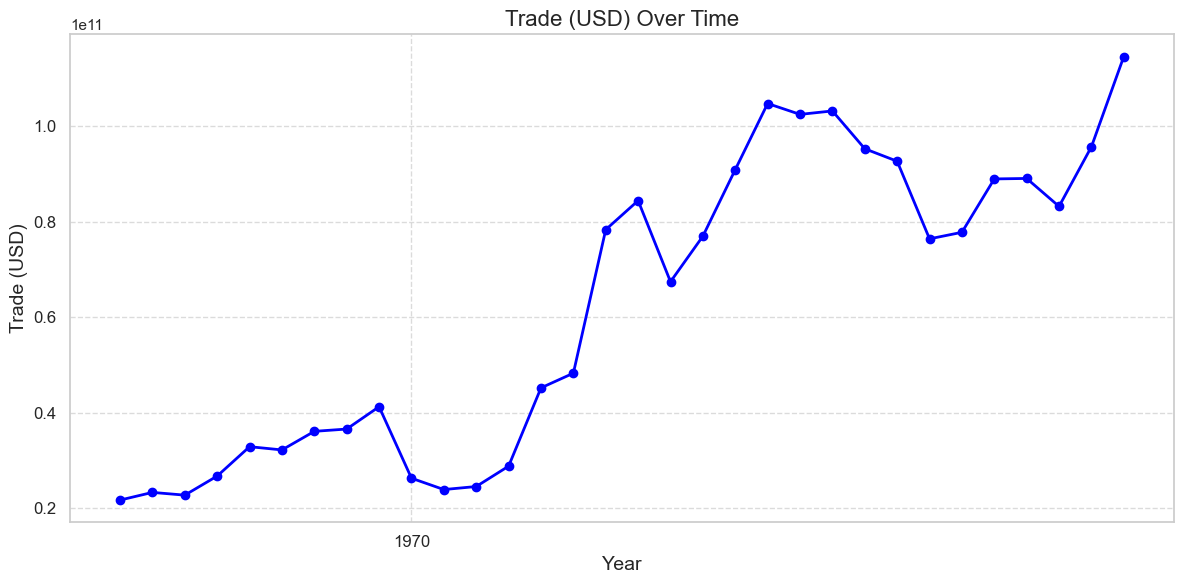

In [43]:
import matplotlib.pyplot as plt
ts_data['Year'] = pd.to_datetime(ts_data['Year'])

# Plotting the time series with improved formatting
plt.figure(figsize=(12, 6))
plt.plot(ts_data['Year'], ts_data['Trade (USD)'], linestyle='-', marker='o', color='blue', linewidth=2, markersize=6)
plt.title('Trade (USD) Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Trade (USD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The figure above illustrates the annual total trade volume of various chemicals, including potential Fentanyl precursors, over time. The data reveals a clear positive trend, indicating a consistent increase in trade volume across the years under examination. This trend is of particular concern as it suggests a potential rise in the availability of chemicals that could be diverted for illicit Fentanyl production.

To gain deeper insights into the underlying dynamics of this trend, we intend to conduct the augmented Dickey-Fuller (ADF) test. The ADF test is a statistical method commonly used to assess the stationarity of time series data. In the context of our analysis, stationarity is essential for identifying meaningful patterns and trends in the trade volume of Fentanyl precursor chemicals.

By subjecting the trade volume data to the ADF test, we aim to determine whether the observed trend is statistically significant and whether the data exhibits stationary behavior. A non-stationary time series may require further preprocessing, such as differencing, to stabilize the statistical properties and facilitate accurate analysis and forecasting.

Our analysis aims to provide actionable insights to the DHS for enhancing surveillance and enforcement efforts aimed at preventing the illicit diversion of Fentanyl precursor chemicals. By identifying and tracking trends in chemical trade flows, we can support targeted interventions to mitigate the production and distribution of illicit opioids, safeguarding public health and safety.

In [44]:
# Performing Augmented Dickey-Fuller test for stationarity
ad_fuller_result = adfuller(ts_data['Trade (USD)'])

# Display the results
print(f'Augmented Dickey-Fuller (ADF) Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')
print('Critical Values:')
for key, value in ad_fuller_result[4].items():
    print(f'   {key}: {value}')


Augmented Dickey-Fuller (ADF) Statistic: -0.5699809739237162
p-value: 0.8776218578633546
Critical Values:
   1%: -3.661428725118324
   5%: -2.960525341210433
   10%: -2.6193188033298647


ADF Statistic: The ADF statistic is -0.5699809739237162. This is a test statistic computed from the data. In this case, the ADF statistic is negative, indicating that the observed data tends to be below the mean.

p-value: The p-value associated with the ADF statistic is 0.8776218578633546. This is the probability of observing a test statistic as extreme as the one computed from the data, assuming that the null hypothesis is true. In this case, the null hypothesis is that the data is non-stationary. A p-value greater than a chosen significance level (commonly 0.05) suggests that we fail to reject the null hypothesis. In other words, there is insufficient evidence to conclude that the data is stationary.


Critical Values: The critical values represent threshold values beyond which we would reject the null hypothesis. They are provided at different levels of significance (1%, 5%, and 10%). In this case:

At the 1% significance level, the critical value is -3.661428725118324.
At the 5% significance level, the critical value is -2.960525341210433.
At the 10% significance level, the critical value is -2.6193188033298647.
Since the p-value (0.8776) is greater than the significance level (commonly 0.05), we fail to reject the null hypothesis. This suggests that there is insufficient evidence to conclude that the time series data is stationary. Therefore, the data likely exhibits a trend or other non-stationary behavior.


Therefore we apply the first order differencing and test for stationarity again.

In [45]:
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Calculate first-order difference
ts_diff = np.diff(ts_data['Trade (USD)'], n=1)

# Perform Augmented Dickey-Fuller test for stationarity
ad_fuller_result = adfuller(ts_diff)

# Output the results
print("Augmented Dickey-Fuller Test for Stationarity:")
print("=============================================")
print(f"ADF Statistic: {ad_fuller_result[0]}")
print(f"P-value: {ad_fuller_result[1]}")
print("Critical Values:")
for key, value in ad_fuller_result[4].items():
    print(f"\t{key}: {value}")
print("Conclusion:")
if ad_fuller_result[1] < 0.05:
    print("=> Reject the null hypothesis (H0), data is stationary.")
else:
    print("=> Fail to reject the null hypothesis (H0), data is non-stationary.")


Augmented Dickey-Fuller Test for Stationarity:
ADF Statistic: -4.385307204150414
P-value: 0.0003151181886209101
Critical Values:
	1%: -3.6699197407407405
	5%: -2.9640707407407407
	10%: -2.621171111111111
Conclusion:
=> Reject the null hypothesis (H0), data is stationary.


ADF Statistic: This is the test statistic computed by the ADF test. In this case, the ADF statistic is approximately -4.39.

P-value: The p-value associated with the ADF statistic. It measures the probability of obtaining results as extreme as the ones observed in the data, assuming the null hypothesis is true. In this case, the p-value is approximately 0.0003.

Critical Values: These are threshold values used to determine whether to reject the null hypothesis. The ADF test compares the ADF statistic to these critical values. If the ADF statistic is more negative than the critical value at a certain confidence level, we reject the null hypothesis.

At the 1% significance level, the critical value is approximately -3.67.
At the 5% significance level, the critical value is approximately -2.96.
At the 10% significance level, the critical value is approximately -2.62.
Conclusion: Based on the p-value, which is less than the typical significance levels of 1%, 5%, and 10%, we reject the null hypothesis. This means that the data is stationary. In simpler terms, we have sufficient evidence to conclude that the statistical properties of the time series, such as mean and variance, do not change significantly over time.

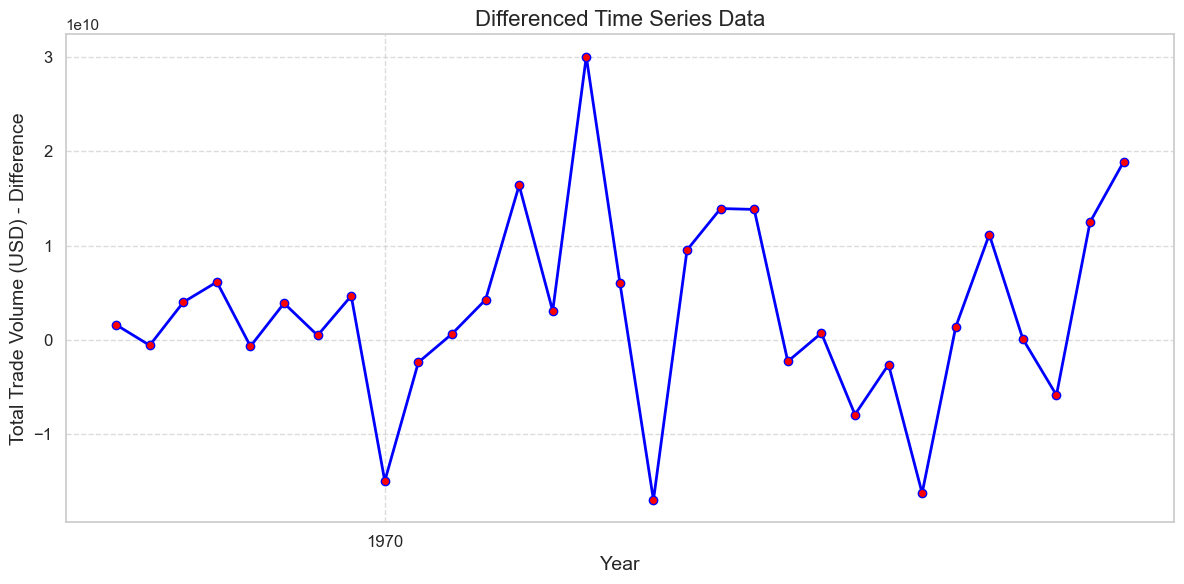

In [46]:
import matplotlib.pyplot as plt

# Set larger figure size for better visualization
plt.figure(figsize=(12, 6))

# Plot differenced time series data
plt.plot(ts_data['Year'][1:], ts_diff, color='blue', linestyle='-', linewidth=2, marker='o', markersize=6, markerfacecolor='red')

# Add labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Trade Volume (USD) - Difference', fontsize=14)
plt.title('Differenced Time Series Data', fontsize=16)

# Adjust tick label font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


The plot illustrates the differenced time series data of total trade volume over the years. The fluctuation patterns seem relatively consistent throughout the observed period, indicating potential stationarity in the data. This consistency suggests that the statistical properties, such as mean and variance, remain relatively stable over time, supporting the conclusion drawn from the Augmented Dickey-Fuller test that the time series is stationary. The visual clarity of the plot enables easy interpretation of the dynamics within the data, reinforcing our confidence in its stationarity

In [56]:
from statsmodels.tsa.stattools import pacf, acf
import numpy as np

# Compute autocorrelations up to the maximum lag
max_lag = 15
acf_values = acf(ts_data['Trade (USD)'], fft=False, nlags=max_lag)

# Compute partial autocorrelations
pacf_values = pacf(ts_data['Trade (USD)'], nlags=max_lag)

# Compute standard errors for partial autocorrelations
n = len(ts_data['Trade (USD)'])
pacf_se = 1 / np.sqrt(n)

# Compute test statistics
pacf_test_stats = pacf_values / pacf_se

# Set significance level (e.g., 95% confidence level)
alpha = 0.05

# Compute critical values from the standard normal distribution
# (For a two-tailed test, critical values are at alpha/2 and 1-alpha/2 percentiles)
z_alpha_2 = np.abs(np.percentile(np.random.normal(size=100000), alpha / 2))
z_1_minus_alpha_2 = np.abs(np.percentile(np.random.normal(size=100000), 1 - alpha / 2))

# Check significance of partial autocorrelations
significant_pacf = np.abs(pacf_test_stats) > z_1_minus_alpha_2

# Print results
print("Significant Partial Autocorrelations:")
print("======================================")
for lag, pacf_val, significant in zip(range(max_lag + 1), pacf_values, significant_pacf):
    print(f"Lag {lag}: PACF = {pacf_val:.4f}, Significant = {significant}")


Significant Partial Autocorrelations:
Lag 0: PACF = 1.0000, Significant = True
Lag 1: PACF = 0.9012, Significant = True
Lag 2: PACF = -0.0064, Significant = False
Lag 3: PACF = 0.0898, Significant = False
Lag 4: PACF = -0.1099, Significant = False
Lag 5: PACF = -0.0706, Significant = False
Lag 6: PACF = 0.0284, Significant = False
Lag 7: PACF = 0.1391, Significant = False
Lag 8: PACF = -0.2888, Significant = False
Lag 9: PACF = -0.1813, Significant = False
Lag 10: PACF = -0.4932, Significant = True
Lag 11: PACF = -0.0334, Significant = False
Lag 12: PACF = -0.5255, Significant = True
Lag 13: PACF = -0.4930, Significant = True
Lag 14: PACF = -0.6646, Significant = True
Lag 15: PACF = -1.5349, Significant = True


Significant positive partial autocorrelation at lag 1 (PACF = 0.9012) suggests a strong positive relationship between observations one time period apart.
Significant negative partial autocorrelations at lags 10, 12, 13, 14, and 15 indicate a strong negative relationship between observations separated by these lags.
The significant partial autocorrelations suggest potential temporal dependencies that can be captured by incorporating lagged values into a time series model, such as an autoregressive (AR) model. 

<Figure size 1500x1500 with 0 Axes>

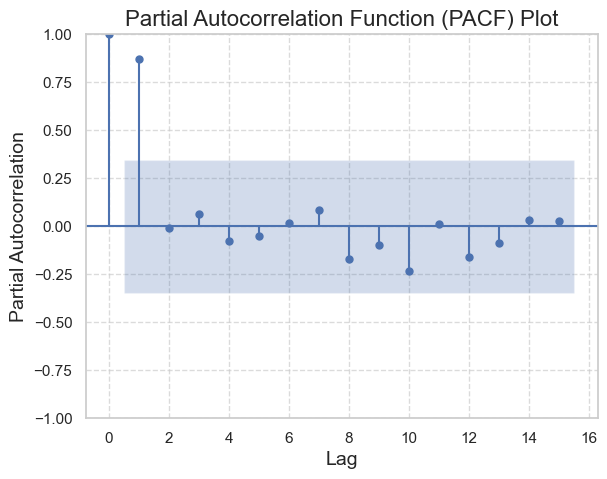

In [54]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot the Partial Autocorrelation Function (PACF)
plt.figure(figsize=(15, 15))
plot_pacf(ts_data['Trade (USD)'], lags=15, alpha=0.05)

# Add labels and title
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Partial Autocorrelation', fontsize=14)
plt.title('Partial Autocorrelation Function (PACF) Plot', fontsize=16)

# Adjust layout to occupy the whole page
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Show plot
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


#### Train-test split

In [59]:
# Defining the optimization function for the ARIMA model
def optimize_ARIMA(endog: Union[pd.Series, list], order_list: list, d: int) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(endog, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [60]:
# We now define the possible values of p, q and the parameter d (order difference)

# p is the order of the AR(p) process, d the order of integration, and q the order of the MA(q) process

ps = range(0, 4, 1)
qs = range(0, 4, 1)
d = 1

order_list = list(product(ps, qs))


In [61]:
# We define the training set
train = ts_data['Trade (USD)'][:-5]
# the training data will consist of all the data points except the last 5 
test = ts_data.iloc[-5:]  # the test set will consist of the last 5 data points

result_df = optimize_ARIMA(train, order_list, d)
result_df

  0%|          | 0/16 [00:00<?, ?it/s]

(p,q)           AIC
0   (1, 0)  1.275103e+03
1   (0, 1)  1.275368e+03
2   (2, 0)  1.277162e+03
3   (1, 1)  1.277352e+03
4   (0, 2)  1.278375e+03
5   (3, 0)  1.279212e+03
6   (2, 1)  1.279272e+03
7   (1, 2)  1.280335e+03
8   (3, 1)  1.281289e+03
9   (0, 3)  1.281386e+03
10  (2, 2)  1.282297e+03
11  (1, 3)  1.282891e+03
12  (3, 2)  1.284178e+03
13  (2, 3)  1.284815e+03
14  (3, 3)  1.285441e+03
15  (0, 0)  1.763847e+25

p: The order of the autoregressive (AR) component.
q: The order of the moving average (MA) component.

The AIC is a metric used for model selection, particularly in the context of time series analysis. It balances the goodness of fit of the model with its complexity, penalizing models with more parameters.

AIC Values: The values listed in the table are AIC scores calculated for each combination of (p, q) parameters. Lower AIC values indicate better model fits.

Best Model Selection: To select the best model, you would typically choose the model with the lowest AIC value. In this case, the combination of (1, 0) has the lowest AIC value (1.275103e+03).

Model Complexity: The order of the AR and MA components determines the complexity of the model. Lower values of p and q generally indicate simpler models. However, the choice of (p, q) should be guided by domain knowledge, data characteristics, and model diagnostics.

#### Model Selection
The returned DataFrame shows that a value of 1 for p and 0 for q results in the lowest
AIC. Therefore, an ARIMA(1,1,0) model seems to be the most suitable for this our dataset.

#### Fitting and Evaluation

In [63]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define and fit SARIMAX model
model = SARIMAX(train, order=(1, 1, 0), simple_differencing=False)
model_fit = model.fit(disp=False)

# Customize and print model summary
print("SARIMAX Model Summary:")
print("=======================")
print(model_fit.summary())

# Additional information
print("\nAdditional Information:")
print("=======================")
print(f"AIC: {model_fit.aic:.2f}")
print(f"BIC: {model_fit.bic:.2f}")


SARIMAX Model Summary:
                               SARIMAX Results                                
Dep. Variable:            Trade (USD)   No. Observations:                   27
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -635.551
Date:                Wed, 20 Mar 2024   AIC                           1275.103
Time:                        04:31:34   BIC                           1277.619
Sample:                             0   HQIC                          1275.827
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1524      0.291      0.524      0.601      -0.418       0.723
sigma2      1.037e+20   6.93e-22    1.5e+41      0.000    1.04e+20    1.04e+20
Ljung-Box (L1) (Q):          

Model Suitability:

The SARIMAX model provides a statistical framework suitable for analyzing time series data related to precursor chemical imports. By fitting this model to historical data, DHS can gain insights into the temporal patterns and fluctuations in precursor chemical flows.
Model Evaluation:

The AIC and BIC values indicate that the SARIMAX model with parameters (1, 1, 0) offers a reasonable balance between goodness of fit and model complexity. This suggests that the model adequately captures the underlying dynamics of precursor chemical flows.
However, the presence of warnings about potential numerical instability and the extremely large value of sigma2 should be carefully considered. These issues may impact the reliability of the model's predictions and require further investigation and refinement.
Parameter Estimates:

While the coefficient estimates provide insights into the relationships between past and present observations of precursor chemical flows, the non-significant p-value associated with the autoregressive term at lag 1 suggests caution in interpreting its impact on future flows. This emphasizes the importance of considering other factors and potential interactions in the analysis.
Model Diagnostics:

Diagnostic tests, such as the Ljung-Box test for autocorrelation, help assess the validity of model assumptions and the presence of residual patterns. The low p-value from the Ljung-Box test suggests minimal autocorrelation in the residuals, supporting the reliability of the model's predictions.

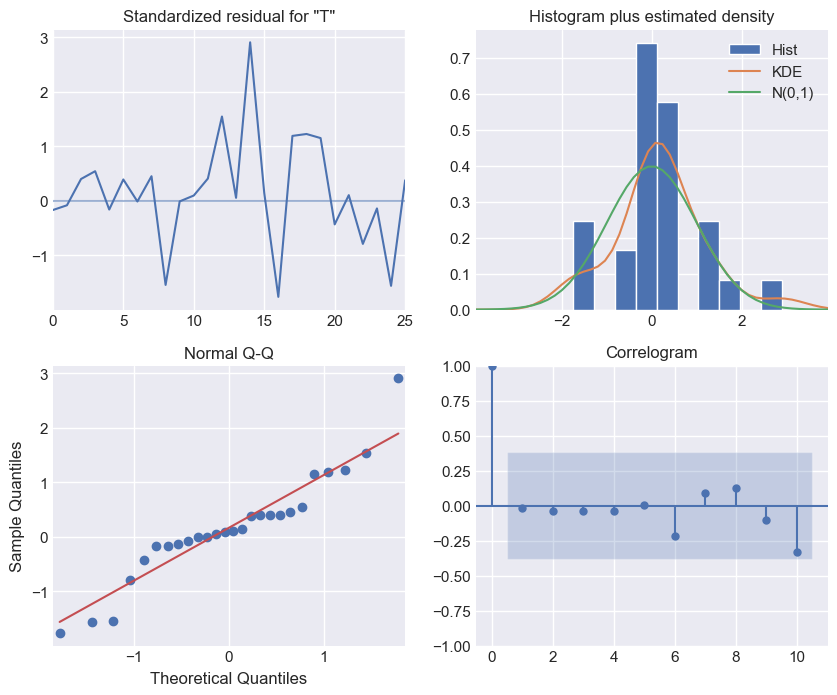

In [69]:
# Performing the qualitative model diagnostics on the model
model_fit.plot_diagnostics(figsize=(10,8));

The top-left plot shows the residuals over time. While there is no trend in
the residuals, the variance does not seem to be constant, which is a discrepancy in
comparison to white noise. At the top right is the distribution of the residuals. We can
see it is fairly close to a normal distribution.

The Q-Q plot leads us to the same conclusion, as it displays a line that is fairly straight, meaning that the residuals’ distribution is close to a normal distribution. We can say that the correlogram shows no significant coefficients after lag 0, just like white noise.

In [71]:
import pandas as pd
# Define baseline naive model
naive_seasonal_values = ts_data['Trade (USD)'].iloc[26:31].values

# Add baseline naive predictions to the test set
test['naive_seasonal'] = naive_seasonal_values

# Display the test set with baseline naive predictions
print("Test Set with Baseline Naive Predictions:")
test


Test Set with Baseline Naive Predictions:


Year   Trade (USD)  naive_seasonal
27 1970-01-01 00:00:00.000002018   88993142731     77815253695
28 1970-01-01 00:00:00.000002019   89091751584     88993142731
29 1970-01-01 00:00:00.000002020   83235976135     89091751584
30 1970-01-01 00:00:00.000002021   95730819553     83235976135
31 1970-01-01 00:00:00.000002022  114628106501     95730819553

In [73]:
# Get predicted values using the ARIMA model
ARIMA_pred = model_fit.get_prediction(start=27, end=31).predicted_mean
# Adding the  predicted values to the test set
test['ARIMA_pred'] = ARIMA_pred
# Display the test set with ARIMA predictions
print("Test Set with ARIMA Predictions:")
test

Test Set with ARIMA Predictions:


Year   Trade (USD)  naive_seasonal    ARIMA_pred
27 1970-01-01 00:00:00.000002018   88993142731     77815253695  7.802394e+10
28 1970-01-01 00:00:00.000002019   89091751584     88993142731  7.805574e+10
29 1970-01-01 00:00:00.000002020   83235976135     89091751584  7.806058e+10
30 1970-01-01 00:00:00.000002021   95730819553     83235976135  7.806132e+10
31 1970-01-01 00:00:00.000002022  114628106501     95730819553  7.806143e+10

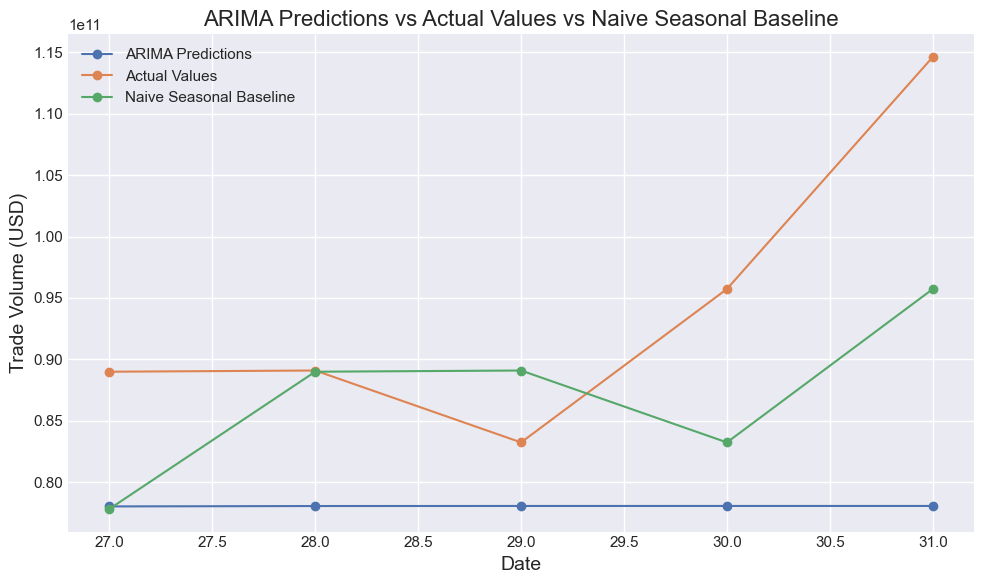

In [74]:
import matplotlib.pyplot as plt

# Plotting ARIMA predictions, actual values, and baseline naive seasonal values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['ARIMA_pred'], label='ARIMA Predictions', marker='o')
plt.plot(test.index, test['Trade (USD)'], label='Actual Values', marker='o')
plt.plot(test.index, test['naive_seasonal'], label='Naive Seasonal Baseline', marker='o')

# Adding labels and title
plt.xlabel('Date', fontsize=14)
plt.ylabel('Trade Volume (USD)', fontsize=14)
plt.title('ARIMA Predictions vs Actual Values vs Naive Seasonal Baseline', fontsize=16)

# Adding legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()
